In [16]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
np.set_printoptions(suppress=True, precision = 2)

In [18]:
nba = pd.read_csv('./nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [19]:
# Subset of Data to 2010 and 2014 seasons
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [20]:
knicks_pts_10 = nba_2010.pts[nba.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba.fran_id == 'Nets']

In [21]:
diff_means_2010 = np.mean(knicks_pts_10) - np.mean(nets_pts_10)
diff_means_2010

9.731707317073173

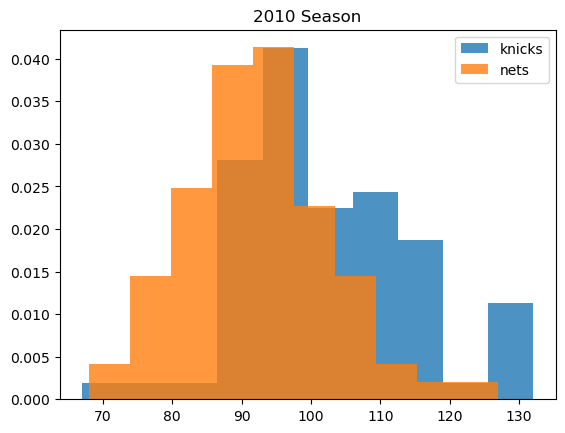

In [22]:
plt.hist(knicks_pts_10, alpha=0.8, density=True, label='knicks')
plt.hist(nets_pts_10, alpha=0.8, density=True, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

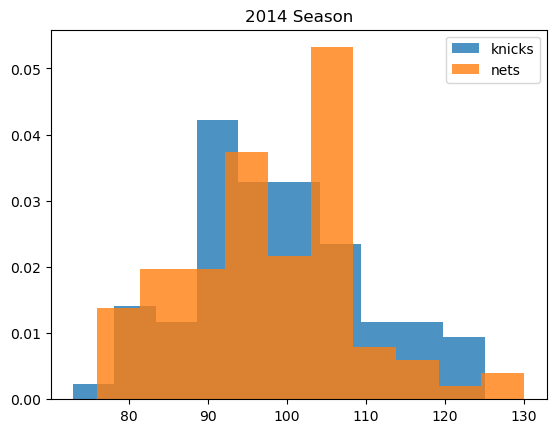

In [23]:
knicks_pts_14 = nba_2014.pts[nba.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba.fran_id == 'Nets']
diff_means_2014 = np.mean(knicks_pts_14) - np.mean(nets_pts_14)

# Layered histogram of 2014 Knicks and Nets
plt.hist(knicks_pts_14, alpha=0.8, density=True, label='knicks')
plt.hist(nets_pts_14, alpha=0.8, density=True, label='nets')
plt.legend()
plt.title("2014 Season")
plt.show()

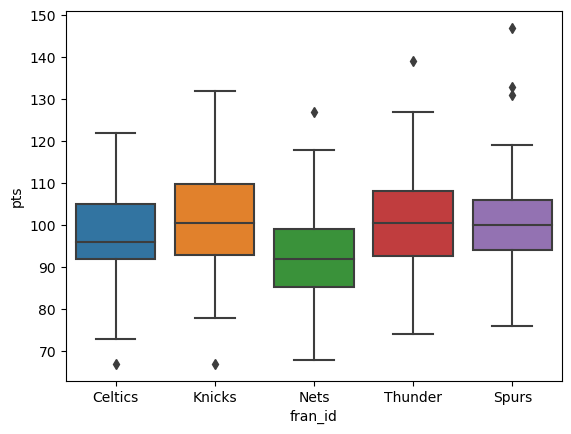

In [24]:
# Boxplot of 2010 teams and points comparison
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

In [25]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq
location_result_proportions = location_result_freq / len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


In [26]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


In [27]:
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_cov
# covariance = 1.37

array([[  0.05,   1.37],
       [  1.37, 186.56]])

In [28]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.44020887084680815, pvalue=9.410391573138826e-23)

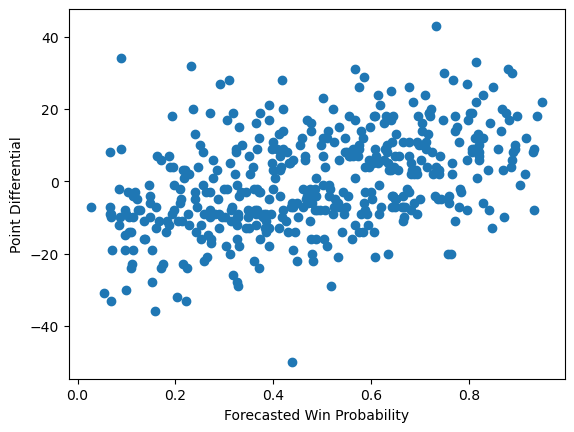

In [29]:
plt.clf()

# Scatterplot of 2010 teams between FWP and Point Diff
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Point Differential')
plt.show()